In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
data = pd.read_csv('data\TSLA.csv')

In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [5]:
data['Close'] = pd.to_numeric(data['Close'],errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
trainData

array([[  4.392   ],
       [  3.84    ],
       [  3.222   ],
       ...,
       [805.719971],
       [811.080017],
       [818.320007]])

In [10]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(2843, 1)

In [19]:
X_train = []
y_train = []

for i in range(60,2843): #60 : timestep // 2843 : Length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(2783, 60, 1)

In [21]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
X_train

array([[[1.40011133e-03],
        [7.72788721e-04],
        [7.04601481e-05],
        ...,
        [9.25073557e-04],
        [8.54613409e-04],
        [9.77350441e-04]],

       [[7.72788721e-04],
        [7.04601481e-05],
        [0.00000000e+00],
        ...,
        [8.54613409e-04],
        [9.77350441e-04],
        [1.07508549e-03]],

       [[7.04601481e-05],
        [0.00000000e+00],
        [3.77302728e-04],
        ...,
        [9.77350441e-04],
        [1.07508549e-03],
        [1.27282848e-03]],

       ...,

       [[7.30808077e-01],
        [7.47036673e-01],
        [7.41115723e-01],
        ...,
        [8.98310048e-01],
        [8.89082047e-01],
        [8.96412189e-01]],

       [[7.47036673e-01],
        [7.41115723e-01],
        [7.34262942e-01],
        ...,
        [8.89082047e-01],
        [8.96412189e-01],
        [9.12072490e-01]],

       [[7.41115723e-01],
        [7.34262942e-01],
        [7.27580586e-01],
        ...,
        [8.96412189e-01],
        [9.1207

In [25]:
hist = model.fit(X_train,y_train,epochs = 200,batch_size=32,verbose=2)

Epoch 1/200
87/87 - 10s - loss: 7.3417e-04 - 10s/epoch - 110ms/step
Epoch 2/200
87/87 - 9s - loss: 7.5114e-04 - 9s/epoch - 98ms/step
Epoch 3/200
87/87 - 8s - loss: 7.0410e-04 - 8s/epoch - 96ms/step
Epoch 4/200
87/87 - 8s - loss: 6.2174e-04 - 8s/epoch - 96ms/step
Epoch 5/200
87/87 - 9s - loss: 5.4682e-04 - 9s/epoch - 100ms/step
Epoch 6/200
87/87 - 9s - loss: 5.8327e-04 - 9s/epoch - 100ms/step
Epoch 7/200
87/87 - 8s - loss: 4.9713e-04 - 8s/epoch - 97ms/step
Epoch 8/200
87/87 - 8s - loss: 4.8229e-04 - 8s/epoch - 96ms/step
Epoch 9/200
87/87 - 8s - loss: 7.2187e-04 - 8s/epoch - 97ms/step
Epoch 10/200
87/87 - 8s - loss: 4.6634e-04 - 8s/epoch - 95ms/step
Epoch 11/200
87/87 - 8s - loss: 5.4596e-04 - 8s/epoch - 95ms/step
Epoch 12/200
87/87 - 8s - loss: 5.4418e-04 - 8s/epoch - 95ms/step
Epoch 13/200
87/87 - 8s - loss: 5.5587e-04 - 8s/epoch - 95ms/step
Epoch 14/200
87/87 - 9s - loss: 6.7959e-04 - 9s/epoch - 104ms/step
Epoch 15/200
87/87 - 9s - loss: 5.2661e-04 - 9s/epoch - 105ms/step
Epoch 16/200

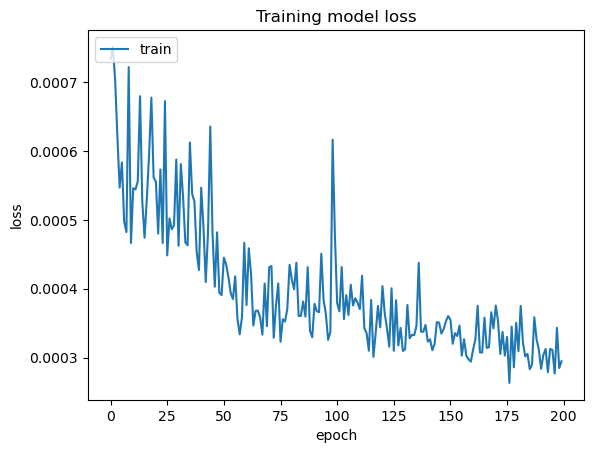

In [26]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [33]:
X_train

array([[[1.40011133e-03],
        [7.72788721e-04],
        [7.04601481e-05],
        ...,
        [9.25073557e-04],
        [8.54613409e-04],
        [9.77350441e-04]],

       [[7.72788721e-04],
        [7.04601481e-05],
        [0.00000000e+00],
        ...,
        [8.54613409e-04],
        [9.77350441e-04],
        [1.07508549e-03]],

       [[7.04601481e-05],
        [0.00000000e+00],
        [3.77302728e-04],
        ...,
        [9.77350441e-04],
        [1.07508549e-03],
        [1.27282848e-03]],

       ...,

       [[7.30808077e-01],
        [7.47036673e-01],
        [7.41115723e-01],
        ...,
        [8.98310048e-01],
        [8.89082047e-01],
        [8.96412189e-01]],

       [[7.47036673e-01],
        [7.41115723e-01],
        [7.34262942e-01],
        ...,
        [8.89082047e-01],
        [8.96412189e-01],
        [9.12072490e-01]],

       [[7.41115723e-01],
        [7.34262942e-01],
        [7.27580586e-01],
        ...,
        [8.96412189e-01],
        [9.1207

In [35]:
print("X train : ",x_train.shape,"\nX_test : ",x_test.shape,"\nY_train : ",Y_train.shape,"\nY_test ",Y_test.shape)

X train :  (1948, 60, 1) 
X_test :  (835, 60, 1) 
Y_train :  (1948,) 
Y_test  (835,)


(835,) [ 2.03208137e+00  1.69924688e+00  5.45012414e-01  4.00717278e+01
  1.94733543e+01  1.86351383e+00 -7.87571132e-01  2.44158173e+00
  6.93105316e+01  3.72619514e+01  1.77464352e+01  1.49931021e+01
  7.12114639e+01  8.42824817e-01  3.52449894e-01  6.41539551e+02
  4.23834190e+01  1.74356804e+01  1.97317001e+02 -5.30825496e-01
  6.48544610e-01  6.52273560e+01  1.61779663e+02  5.04311714e+01
  2.05962881e-01  4.74683952e+01  3.37841415e+01  3.93042603e+01
  5.32188892e-01  3.60179062e+01  9.84276831e-01  5.13460503e+01
 -9.38476920e-01  1.30394685e+00  7.00422424e+02  3.04750710e+01
  1.13035738e+00  3.00223351e+01  5.13980064e+01  4.74233551e+01
  4.73614197e+01  3.47262001e+01  1.55866745e+02  3.80872574e+01
  4.82003059e+01  2.99842110e+01  5.94772873e+01  3.34277191e+01
  3.53170891e+01  6.82462158e+02  3.99495010e+01  3.77691727e+01
  9.75793362e-01  6.97536743e+02  4.44796867e+01  4.70897903e+01
  2.54923038e+01  4.33631439e+01  2.47705669e+01 -1.39905745e-02
  1.65456116e+00  

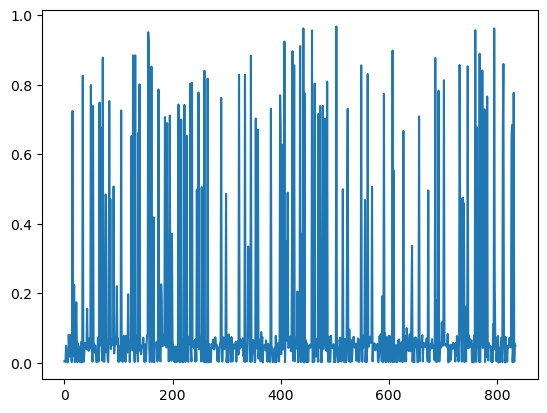

In [56]:
plt.plot(Y_test)
print(pred_price.reshape(-1).shape,pred_price.reshape(-1))

27/27 [==============================] - 1s 33ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


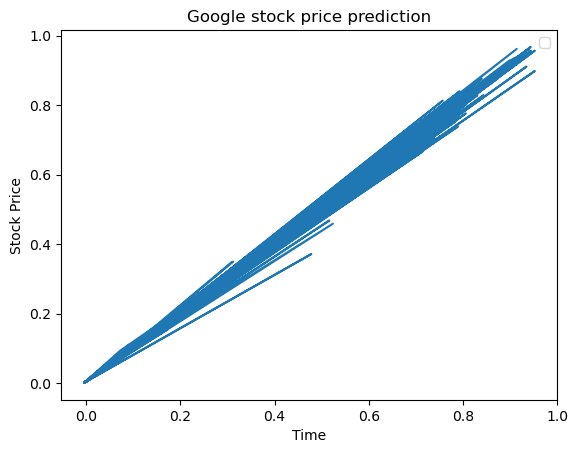

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,Y_train,Y_test = train_test_split(X_train,y_train,train_size=0.7,random_state=541)

y_pred = model.predict(x_test)
pred_price = sc.inverse_transform(y_pred).reshape(-1)

# plt.plot(Y_test,color = 'red',label = 'Actual Stock Price')
# plt.plot(y_pred,color = 'green',label = 'Predicted Stock Price')
plt.plot(y_pred,Y_test)
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

(835,) (835,)


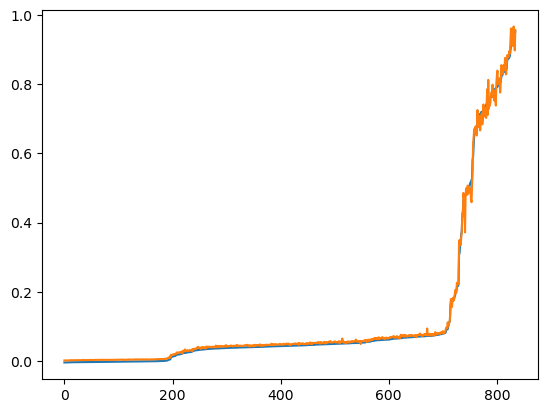

In [68]:
y_pred = y_pred.reshape(-1)
print(y_pred.shape,Y_test.shape)
d = sorted(dict(zip(y_pred,Y_test)).items())
plt.plot(d)

In [69]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
#Calculate scores for model evaluation
scores = f''' 
{'Metric'.ljust(10)}{'Test'.center(20)}
{'r2_scores'.ljust(10)}{r2_score(Y_test,y_pred)}
{'mse'.ljust(10)}{mse(Y_test,y_pred)}
'''

In [70]:
print(scores)

 
Metric            Test        
r2_scores 0.9978980362951112
mse       0.00011083095685851366

